In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

N =500
means = [[2,2],[8,3],[3,6]]
cov =[[1,0],[0,1]]

x0 = np.random.multivariate_normal(means[0],cov,N)
x1 = np.random.multivariate_normal(means[1],cov,N)
x2 = np.random.multivariate_normal(means[2],cov,N)

X = np.concatenate((x0,x1,x2),axis =0)
X.shape
K =3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(original_label)

[0 0 0 ... 2 2 2]


3


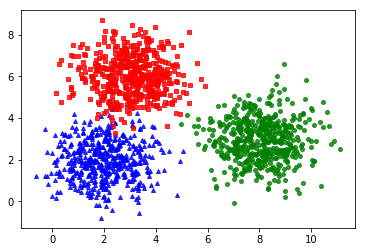

In [55]:
def kmeans_display(X,label):
    K = 3
    print(K)
    X0 = X[label == 0,:] # 500 diem du lieu (2,2)
    X1 = X[label == 1,:] # 500 diem du lieu (8,3)
    X2 = X[label == 2,:] # 500 diem du lieu (3,6)
#     print("X0",X1.shape, X1)
    plt.plot(X0[:,0],X0[:,1],'b^', markersize =4, alpha =0.8)
    plt.plot(X1[:,0],X1[:,1],'go', markersize =4, alpha =0.8)
    plt.plot(X2[:,0],X2[:,1],'rs', markersize =4, alpha =0.8)
    plt.show()
kmeans_display(X, original_label)

In [56]:
# kmeans_init_centers để khởi tạo các centers ban đầu ( chon ngẫu nhiên 3 hàng của  ma trận X làm trung tâm ban đầu)
# kmeans_asign_labels để gán nhán mới cho các điểm khi biết các centers.
# kmeans_update_centers để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
# has_converged để kiểm tra điều kiện dừng của thuật toán.
def kmeans_init_centers(X, K):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0],K,replace =False)]
def kmeans_asign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1])) # centers =matrix[3,2]
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels ==k,:]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers
def has_converged(centers, new_centers):
     # return True if two sets of centers are the same
    return set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers])
kmeans_init_centers(X,K)
kmeans_asign_labels(X, centers[-1])
kmeans_update_centers(X,labels[-1],K)

array([[1.99861663, 1.96964831],
       [3.0583379 , 6.03908473],
       [8.03424407, 2.95131318]])

Centers of algorithm :  [[8.03424407 2.95131318]
 [3.0583379  6.03908473]
 [1.99861663 1.96964831]]
it 4
3


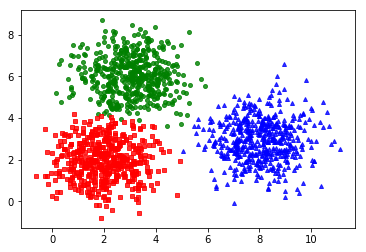

In [82]:
# phần thuật toán chính
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels =[]
    it = 0
    while True:
        labels.append(kmeans_asign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers) == True:
            break
        centers.append(new_centers)
        it +=1
    return (centers, labels, it)
(centers, labels, it) =kmeans(X,K)
print("Centers of algorithm : ", centers[-1])
# print("labels: ", labels[-1])
print("it", it)
kmeans_display(X, labels[-1])

Centers of algorithm :  [[8.03424407 2.95131318]
 [3.0583379  6.03908473]
 [1.99861663 1.96964831]]
3


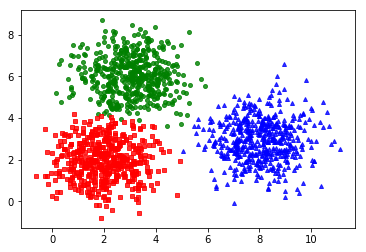

In [93]:
# library KMeans
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters =3, random_state=0)
kmean.fit(X)
print("Centers of algorithm : ", kmean.cluster_centers_)
predict_label = kmean.predict(X) # because not label => predict labels
kmeans_display(X, predict_label)